# Safety time functions

# imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import interpolate
import sys
sys.path.insert(0, '/Home/siv30/wad005/useful_py_functions') #UiB
#sys.path.insert(0, "/Users/andreas/proggis/useful_py_func/") #Mac
import matplotlib_custom_style_and_macros as pltmacro #Importin the py file from dir
%run read_matlab_file.ipynb
%run convert_erg.ipynb

read_matlab_file.ipynb loaded
read_matlab_file.ipynb loaded
convert_erg.ipynb loaded


In [2]:
path = "/Home/siv30/wad005/master/GRB/safety_time/safety_time.csv" #UiB

In [3]:
sf_df = pd.read_csv(path)
sf_df.rename(columns=({"pmt":"det"}))
sf_df.head()

,adr,dau,pmt,E0_kev,minimum_dt_us
0,1,1,1,400,0
1,1,1,1,500,1
2,1,1,1,1000,3
3,1,1,1,2500,11
4,1,1,1,3000,13


# cutting df

In [4]:
#Cutting indecies: there is always 23 rows for each detector
for i in np.arange(0,275,23):
    print(i-1)

-1
22
45
68
91
114
137
160
183
206
229
252


In [5]:
adr_1_df = sf_df.truncate(after=22)
adr_2_df = sf_df.truncate(before=23,after=45)
adr_3_df = sf_df.truncate(before=46,after=68)
adr_4_df = sf_df.truncate(before=69,after=91)
adr_5_df = sf_df.truncate(before=92,after=114)
adr_6_df = sf_df.truncate(before=115,after=137)
adr_7_df = sf_df.truncate(before=138,after=160)
adr_8_df = sf_df.truncate(before=161,after=183)
adr_9_df = sf_df.truncate(before=184,after=206)
adr_10_df = sf_df.truncate(before=207,after=229)
adr_11_df = sf_df.truncate(before=230,after=252)
adr_12_df = sf_df.truncate(before=253)

adr_df_list = [adr_1_df,adr_2_df, adr_3_df,adr_4_df,  adr_5_df,adr_6_df,  adr_7_df,adr_8_df,  adr_9_df,adr_10_df,  adr_11_df,adr_12_df] #validated ok!

In [6]:
print(adr_1_df)

    adr  dau  pmt  E0_kev  minimum_dt_us
0     1    1    1     400              0
1     1    1    1     500              1
2     1    1    1    1000              3
3     1    1    1    2500             11
4     1    1    1    3000             13
5     1    1    1    3500             15
6     1    1    1    4000             15
7     1    1    1    4500             15
8     1    1    1    5000             19
9     1    1    1    6000             19
10    1    1    1    6500             19
11    1    1    1    7000             21
12    1    1    1    7500             21
13    1    1    1   10000             21
14    1    1    1   12500             21
15    1    1    1   15000             21
16    1    1    1   20000             21
17    1    1    1   22500             23
18    1    1    1   25000             23
19    1    1    1   27500             25
20    1    1    1   30000             25
21    1    1    1   35000             27
22    1    1    1   40000             37


In [7]:
print(adr_5_df)

     adr  dau  pmt  E0_kev  minimum_dt_us
92     5    2    2     400              0
93     5    2    2     500              1
94     5    2    2    1000              4
95     5    2    2    2500              9
96     5    2    2    3000             11
97     5    2    2    3500             11
98     5    2    2    4000             13
99     5    2    2    4500             15
100    5    2    2    5000             15
101    5    2    2    6000             17
102    5    2    2    6500             19
103    5    2    2    7000             19
104    5    2    2    7500             19
105    5    2    2   10000             19
106    5    2    2   12500             19
107    5    2    2   15000             21
108    5    2    2   20000             21
109    5    2    2   22500             21
110    5    2    2   25000             21
111    5    2    2   27500             23
112    5    2    2   30000             23
113    5    2    2   35000             25
114    5    2    2   40000        

# Interpolation for all the detectors

/Home/siv30/wad005/anaconda3/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Home/siv30/wad005/anaconda3/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Home/siv30/wad005/anaconda3/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/Home/siv30/wad005/anaconda3/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo
/Home/siv30/wad005/anaconda3/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/H

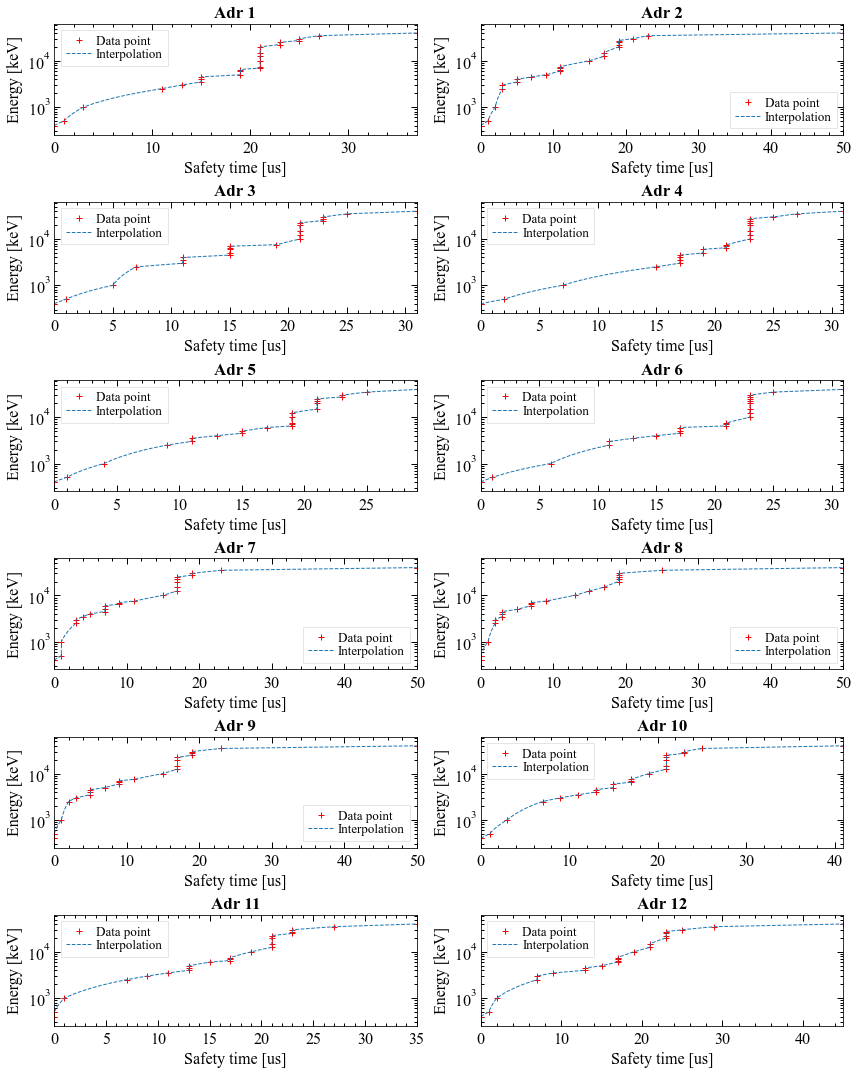

In [8]:
#Creating 6x2 subplots for all the safety time estimates for all the detectors
fig, (axs1,axs2,axs3,axs4,axs5,axs6) = plt.subplots(6,2,figsize=(12,15))
axs_list = [axs1,axs2,axs3,axs4,axs5,axs6]
for i,axs in enumerate(axs_list):
    first_idx = i*2
    sec_idx = i*2 +1
    
    dt_0 = adr_df_list[first_idx]["minimum_dt_us"].values
    keV_0 = adr_df_list[first_idx]["E0_kev"].values
    f_0 = interpolate.interp1d(dt_0, keV_0) #fill_value="extrapolate"  --> specifying what happens if one specifies an input value that is out of bounds used for general function
    dt_0_new = np.arange(min(dt_0),max(dt_0),0.01)
    keV_0_new = f_0(dt_0_new)

    axs[0].plot(dt_0, keV_0,'r+',label="Data point")
    axs[0].plot(dt_0_new, keV_0_new, '--',label="Interpolation")
    axs[0].set_yscale('log')
    axs[0].set_title("Adr {}".format(str(first_idx + 1)), fontweight='bold')
    axs[0].set_xlabel('Safety time [us]')
    axs[0].set_ylabel('Energy [keV]')
    axs[0].legend()
    
    dt_1 = adr_df_list[sec_idx]["minimum_dt_us"].values
    keV_1 = adr_df_list[sec_idx]["E0_kev"].values
    f_1 = interpolate.interp1d(dt_1, keV_1) #fill_value="extrapolate"  --> specifying what happens if one specifies an input value that is out of bounds used for general function
    dt_1_new = np.arange(min(dt_1),max(dt_1),0.01)
    keV_1_new = f_1(dt_1_new)
    
    axs[1].plot(dt_1, keV_1, 'r+',label="Data point")
    axs[1].plot(dt_1_new, keV_1_new, '--',label="Interpolation")
    axs[1].set_yscale('log')
    axs[1].set_title("Adr {}".format(str(sec_idx + 1)), fontweight='bold')
    axs[1].set_xlabel('Safety time [us]')
    axs[1].set_ylabel('Energy [keV]')
    axs[1].legend()
    
fig.tight_layout()
plt.show()

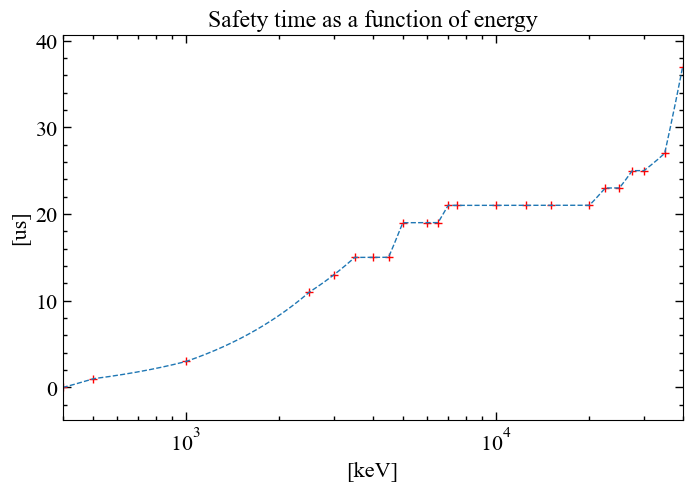

In [10]:
dt_arr = adr_df_list[0]["minimum_dt_us"].values
keV_arr = adr_df_list[0]["E0_kev"].values
f = interpolate.interp1d(keV_arr,dt_arr,fill_value="extrapolate",bounds_error=False) #fill_value="extrapolate"  --> specifying what happens if one specifies an input value that is out of bounds used for general function
keV_new = np.arange(min(keV_arr),max(keV_arr),0.01)
dt_new = f(keV_new)
plt.plot(keV_arr,dt_arr, 'r+', keV_new, dt_new,'--') #, keV_new,dt_new,'-'
plt.xscale('log')
plt.xlabel('[keV]')
plt.ylabel("[us]")
plt.title("Safety time as a function of energy")
plt.show()

In [11]:
def est_st(adr=None,keV=None):
    """Estimating safetytime for a given adr to detector
    and a given keV from energy channel"""
    
    dt_arr = adr_df_list[adr-1]["minimum_dt_us"].values
    keV_arr = adr_df_list[adr-1]["E0_kev"].values
    f = interpolate.interp1d(keV_arr,dt_arr,fill_value="extrapolate",bounds_error=False) #fill_value="extrapolate"  --> specifying what happens if one specifies an input value that is out of bounds used for general function
    sf = f(keV)
    return float(sf)

In [31]:
tus, erg, typ, adr, dau, det, date = read_matlab_file_with_BGO_data(trig_dict_HED["GRB200415"][0])
T0 = datetime.strptime(date, "%Y-%b-%d %H:%M:%S.%f")

datetime.datetime(2020, 4, 15, 8, 48, 5, 561000)

In [14]:
keV = convert_erg(erg,T0)
len(keV)

14494

In [30]:
def flag_st(tus,keV,adr):
    flag_temp = []
    for i,energy in enumerate(keV):
        if (i+1) == len(keV):
            flag_temp.append(0)
            return np.array(flag_temp)
        else:
            st = est_st(adr[i],energy)
            if np.abs(tus[i+1]-tus[i]) <= st:
                flag_temp.append(1)
            else:
                flag_temp.append(0)

In [28]:
flag_st = flag_st(tus,keV,adr)

In [29]:
np.sum(flag_st)

5287

In [32]:
#should be around 136 flags